In [31]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
from tqdm.notebook import tqdm_notebook
#from kneed import KneeLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.optimize import curve_fit
from tqdm import tqdm

# Read data

In [32]:
df = pd.read_csv('./blanco1_10.csv')
df.loc[df['ra'] > 300, 'ra'] -= 360 #SOLO PARA BLANCO 1
#c_pm = (df['pmra'] > -30) & (df['pmra'] < 0) & (df['pmdec'] > 0) & (df['pmdec'] < 30)
#df = df[c_pm]
df = df.fillna(0)
#df['parallax'] = df['parallax'] / 1000
#df['parallax_error'] = df['parallax_error'] / 1000
print(df.shape)
df

(66454, 20)


,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,g,g_error,rp,rp_error,bp,bp_error,rv,rv_error,ruwe
0,2326700950951206656,-1.310146,0.163429,-30.904715,0.163283,3.914041,0.217836,32.399168,0.192345,-15.822850,0.193311,18.759360,1.370000,17.583715,11.332810,20.341318,5.791966,0.000000,0.000000,0.947339
1,2326701294548593664,-1.283605,0.076460,-30.896791,0.075180,2.441120,0.096412,1.248098,0.086853,-12.025827,0.092146,17.533665,1.801142,16.472445,11.871449,18.697681,8.739154,0.000000,0.000000,1.035396
2,2326703429148020864,-1.507285,0.094269,-30.885198,0.079657,3.632595,0.128819,32.406211,0.104204,-38.033217,0.090131,17.546452,2.245442,16.335260,14.867205,19.204350,12.384997,0.000000,0.000000,1.058466
3,2326704047623312128,-1.542979,0.110924,-30.892903,0.102171,4.273970,0.149781,37.440259,0.132048,-1.095678,0.116612,18.113457,1.616189,16.893528,8.417492,19.855154,10.648229,0.000000,0.000000,0.982746
4,2326705486436584960,-1.436226,0.014708,-30.814825,0.013705,2.137523,0.020681,12.483741,0.016195,-6.124740,0.016414,12.047449,93.084280,11.624609,148.913620,12.310934,112.912610,-4.228361,4.037783,1.279725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66449,6537886289844411136,-4.627242,0.025819,-38.467576,0.022295,35.665234,0.034459,280.924237,0.027460,-357.012636,0.024673,14.721041,12.310258,13.404748,25.971354,16.727888,8.574358,38.820060,2.841681,1.338709
66450,6537886526067045888,-4.675351,0.153435,-38.489558,0.125244,3.444303,0.183760,57.076452,0.167382,-28.111299,0.141309,18.771908,1.031885,17.478088,9.609585,20.326740,8.494655,0.000000,0.000000,0.986123
66451,6537888175334543488,-4.487821,0.015738,-38.394274,0.012058,11.323657,0.020480,-8.340182,0.015245,20.722704,0.012749,13.969078,16.937280,12.914649,31.810059,15.093919,17.797577,16.315168,1.806699,1.033571
66452,6537888420148264832,-4.536049,0.080699,-38.384873,0.066174,4.131560,0.111504,18.707485,0.081360,-15.777327,0.070459,17.602955,1.626044,16.401928,9.208789,19.119743,8.267970,0.000000,0.000000,1.014691


In [5]:
#plt.figure(figsize=(20,10))

#plt.subplot(2,3,1)
#plt.hist(df.parallax,bins='auto')
#plt.xlim(0.002,0.01)

#plt.subplot(2,3,2)
#plt.hist(df.ra,bins='auto')

#plt.subplot(2,3,3)
#plt.hist(df.dec,bins='auto')

#plt.subplot(2,3,4)
#plt.hist(df.pmra,bins='auto')
#plt.xlim(-100,100)

#plt.subplot(2,3,5)
#plt.hist(df.pmdec,bins='auto')
#plt.xlim(-100,100)

#plt.subplot(2,3,6)
#plt.scatter(df['ra'], df['dec'], marker='o' , s=1, alpha = 0.5)
#plt.xlabel("ra [deg]",  fontsize = 15)
#plt.ylabel("dec [deg]",  fontsize = 15)#,rotation=0)
#plt.xlim(-30,0)
#plt.ylim(0,30)

#plt.show()

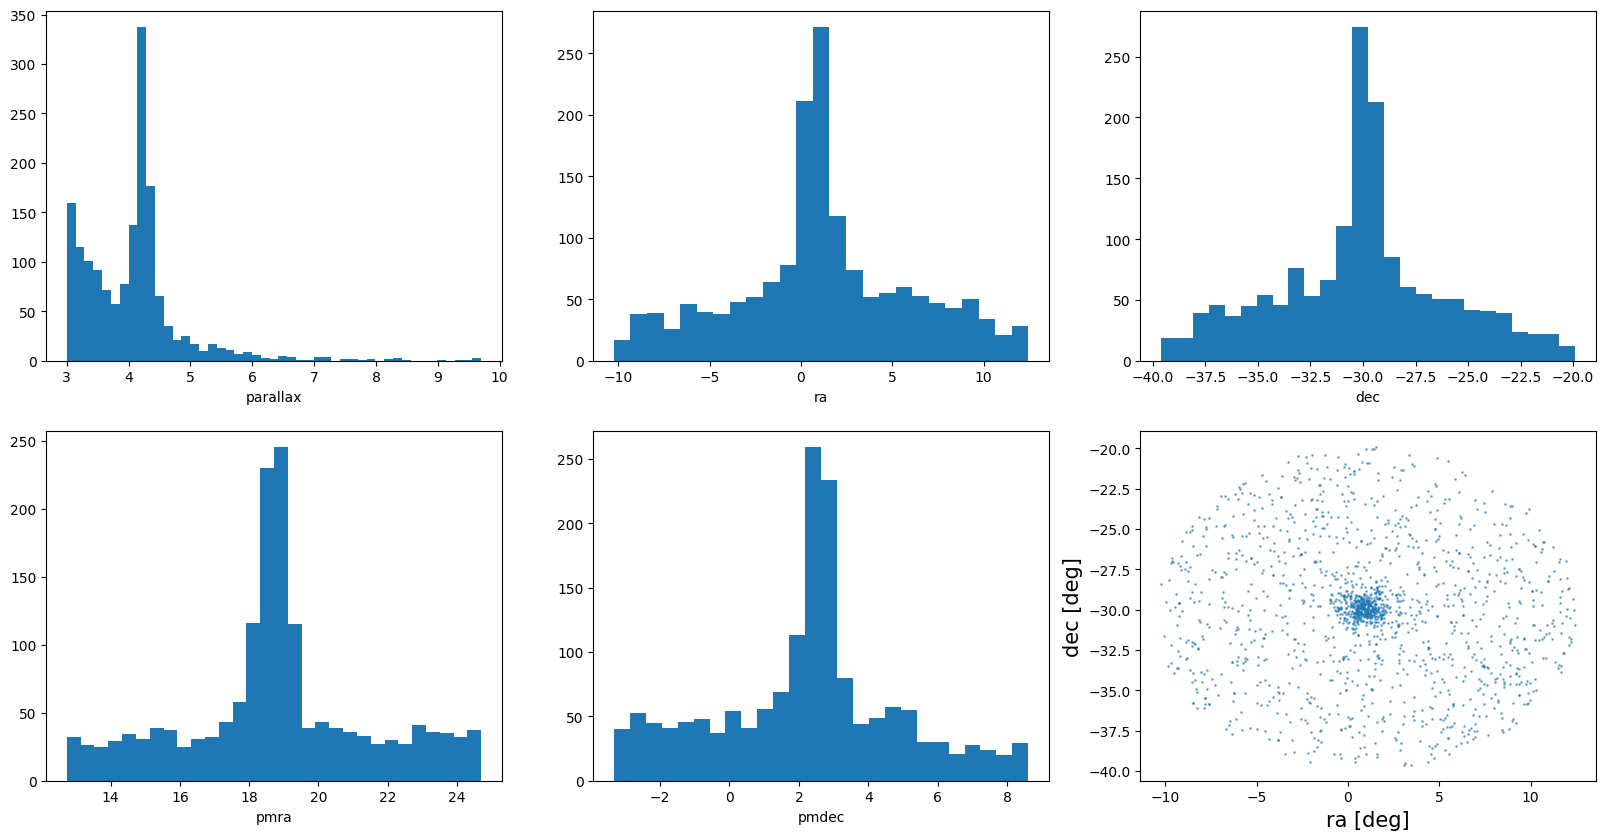

1603


In [34]:
mu_alpha, mu_delta = 18.724, 2.650
rango = 6
c_pm=(df['pmra']>mu_alpha-rango)&(df['pmra']<mu_alpha+rango)&(df['pmdec']>mu_delta-rango)&(df['pmdec']<mu_delta+rango)
c_p = (df['parallax'] > 3) & (df['parallax'] < 10)
df = df[c_pm & c_p]

plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.hist(df.parallax,bins='auto')
#lt.xlim(v_min,v_max)
plt.xlabel('parallax')

plt.subplot(2,3,2)
plt.hist(df.ra,bins='auto')
plt.xlabel('ra')

plt.subplot(2,3,3)
plt.hist(df.dec,bins='auto')
plt.xlabel('dec')

plt.subplot(2,3,4)
plt.hist(df.pmra,bins='auto')
#plt.xlim(-100,100)
plt.xlabel('pmra')

plt.subplot(2,3,5)
plt.hist(df.pmdec,bins='auto')
#plt.xlim(-100,100)
plt.xlabel('pmdec')

plt.subplot(2,3,6)
plt.scatter(df['ra'], df['dec'], marker='o' , s=1, alpha = 0.5)
plt.xlabel("ra [deg]",  fontsize = 15)
plt.ylabel("dec [deg]",  fontsize = 15)#,rotation=0)
#plt.xlim(-30,0)
#plt.ylim(0,30)

plt.show()
print(len(df))

In [35]:
from scipy.optimize import minimize

def log_likelihood(params, x):
    nc, s1, s2, mu1, mu2 = params
    Ac = -0.5*((x - mu1)/s1)**2
    Be = -0.5*((x - mu2)/s2)**2
    y = nc/(np.sqrt(2*np.pi)*s1)*np.exp(Ac) + (1-nc)/(np.sqrt(2*np.pi)*s2)*np.exp(Be)
    # Calculate log likelihood
    return np.sum(np.log(y))

def gaussian_function(x, params):
    nc, s1, s2, mu1, mu2 = params
    Ac = -0.5*((x - mu1)/s1)**2
    Be = -0.5*((x - mu2)/s2)**2
    return nc/(np.sqrt(2*np.pi)*s1)*np.exp(Ac) + (1-nc)/(np.sqrt(2*np.pi)*s2)*np.exp(Be)

nll = lambda *args: -log_likelihood(*args)

In [40]:
sample_data = df.parallax
s1, s2 = np.std(sample_data)/4, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_parallax = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_parallax, sample_data))
results_parallax = minimize(nll, initparams_parallax, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

sample_data = df.ra
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_ra = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_ra, sample_data))
results_ra = minimize(nll, initparams_ra, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

sample_data = df.dec
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_dec = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_dec, sample_data))
results_dec = minimize(nll, initparams_dec, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

sample_data = df.pmra
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_pmra = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_pmra, sample_data))
results_pmra = minimize(nll, initparams_pmra, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

sample_data = df.pmdec
s1, s2 = np.std(sample_data)/2, np.std(sample_data)
mu1, mu2 = np.mean(sample_data), np.mean(sample_data)
initparams_pmdec = [0.5, s1, s2, mu1, mu2]
print(log_likelihood(initparams_pmdec, sample_data))
results_pmdec = minimize(nll, initparams_pmdec, args=(sample_data), 
                            options={"disc":True}, method='Nelder-Mead')

print('parallax:',results_parallax.x)
print('ra:      ',results_ra.x)
print('dec:     ',results_dec.x)
print('pmra:    ',results_pmra.x)
print('pmdec:   ',results_pmdec.x)

-1974.418984532247
-4876.5768088700215
-4568.213831247432
-3895.6478674450586
-3882.4419001608703
parallax: [0.29485332 0.09234021 1.0040754  4.22730491 4.01801848]
ra:       [0.23913996 0.6049405  5.58562802 0.86173456 1.28635388]
dec:      [  0.229867     0.49416444   4.58876157 -29.90495237 -30.12728265]
pmra:     [ 0.31553482  0.37068279  3.25195612 18.71646705 18.8399687 ]
pmdec:    [0.25378458 0.31954942 3.04076445 2.5857113  2.1498751 ]


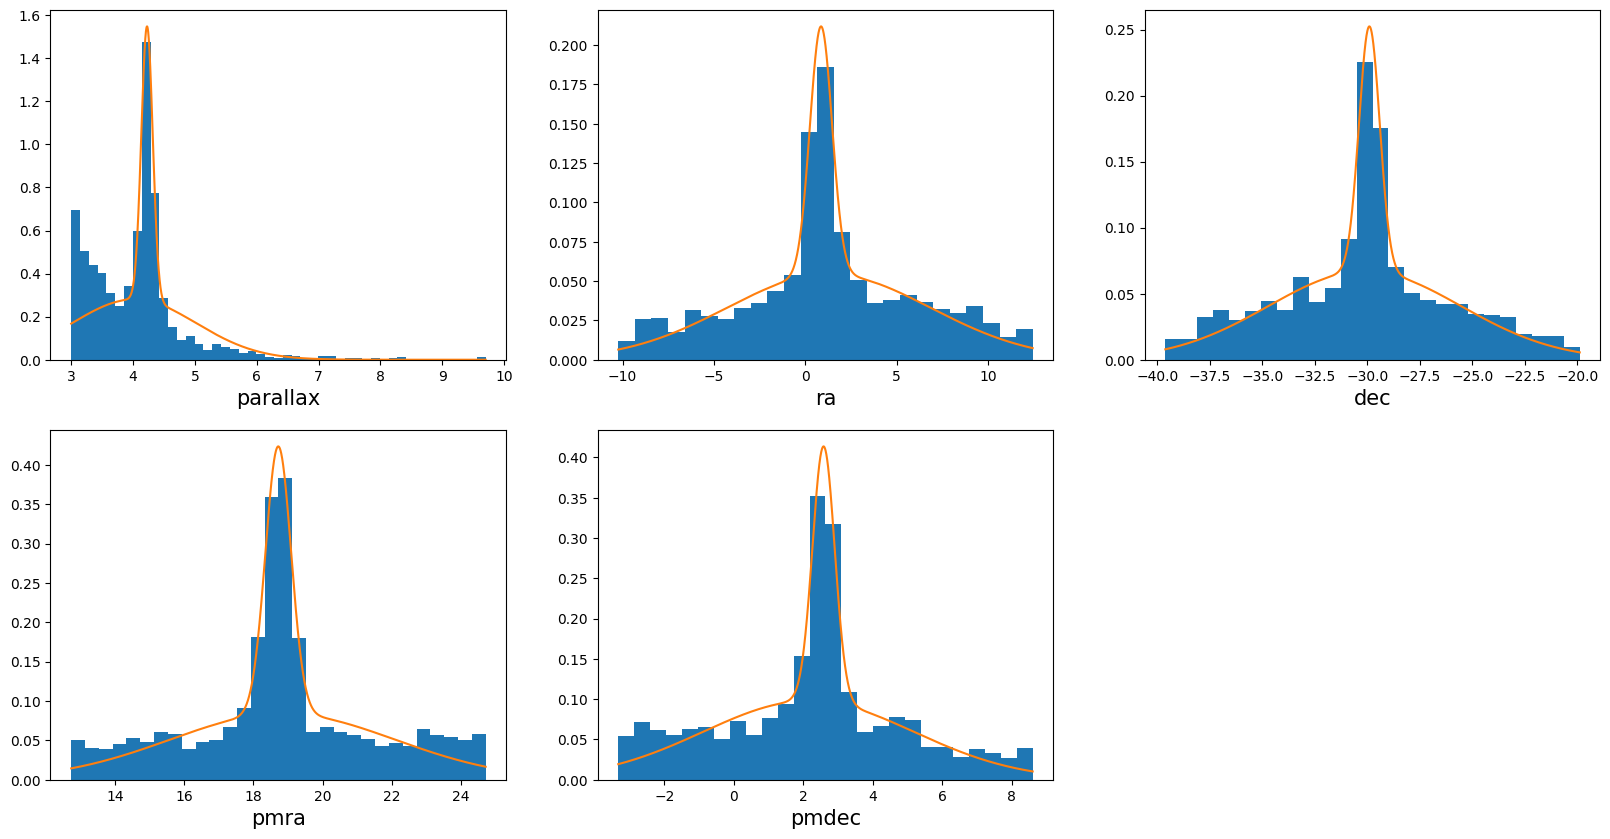

In [41]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
bin_heights,bin_borders,_=plt.hist(df.parallax,bins='auto',range=(min(df.parallax),max(df.parallax)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_parallax.x))
plt.xlabel('parallax',fontsize=15)

plt.subplot(2,3,2)
bin_heights,bin_borders,_=plt.hist(df.ra,bins='auto',range=(min(df.ra),max(df.ra)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_ra.x))
plt.xlabel('ra',fontsize=15)

plt.subplot(2,3,3)
bin_heights,bin_borders,_=plt.hist(df.dec,bins='auto',range=(min(df.dec),max(df.dec)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_dec.x))
plt.xlabel('dec',fontsize=15)

plt.subplot(2,3,4)
bin_heights,bin_borders,_=plt.hist(df.pmra,bins='auto',range=(min(df.pmra),max(df.pmra)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_pmra.x))
plt.xlabel('pmra',fontsize=15)
#plt.xlim(-100,100)

plt.subplot(2,3,5)
bin_heights,bin_borders,_=plt.hist(df.pmdec,bins='auto',range=(min(df.pmdec),max(df.pmdec)),density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, gaussian_function(x, results_pmdec.x))
plt.xlabel('pmdec',fontsize=15)
#plt.xlim(-100,100)
plt.show()

# Generate data

In [42]:
popt = [results_parallax.x, results_ra.x, results_dec.x, results_pmra.x, results_pmdec.x]
names = ['parallax','ra','dec','pmra','pmdec']

for x,i in enumerate(names):
    print(popt[x], i)

[0.29485332 0.09234021 1.0040754  4.22730491 4.01801848] parallax
[0.23913996 0.6049405  5.58562802 0.86173456 1.28635388] ra
[  0.229867     0.49416444   4.58876157 -29.90495237 -30.12728265] dec
[ 0.31553482  0.37068279  3.25195612 18.71646705 18.8399687 ] pmra
[0.25378458 0.31954942 3.04076445 2.5857113  2.1498751 ] pmdec


In [43]:
def pdf(x, params):
    nc, s1, s2, mu1, mu2 = params
    Ac = -0.5*((x - mu1)/s1)**2
    Be = -0.5*((x - mu2)/s2)**2
    return nc/(np.sqrt(2*np.pi)*s1)*np.exp(Ac) + (1-nc)/(np.sqrt(2*np.pi)*s2)*np.exp(Be)

def Metropolis(N, data, params):
    nc, s1, s2, mu1, mu2 = params
    states = []
    burn_in = int(N * 0.1)
    #current = np.random.uniform(-5 * s1 - mu1, 5 * s1 + mu1)
    current = np.random.uniform(min(data), max(data))
    for i in range(N):
        states.append(current)
        #movement = np.random.uniform(-5 * s1 - mu1, 5 * s1 + mu1)
        movement = np.random.uniform(min(data), max(data))
        
        current_prob = pdf(current, params)
        movement_prob = pdf(movement, params)
        
        alpha = min(movement_prob/current_prob, 1)
        g = np.random.rand()
        
        if alpha > g:
            current = movement
            
    return states[burn_in:]

Text(0.5, 0, 'parallax')

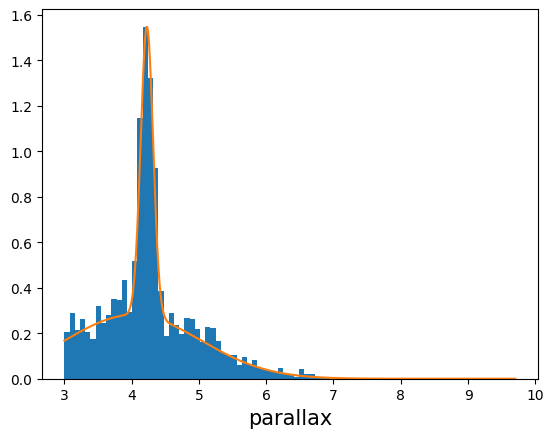

In [44]:
data = df.parallax
params = results_parallax.x
sampling = Metropolis(5000, data, params)
simulated_data = []
simulated_data.append(sampling)
plt.hist(sampling,bins='auto',density=True)
bin_heights, bin_borders=np.histogram(data,bins='auto',density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x, pdf(x, params))
plt.xlabel('parallax',fontsize=15)

  0%|                                                    | 0/10 [00:00<?, ?it/s]

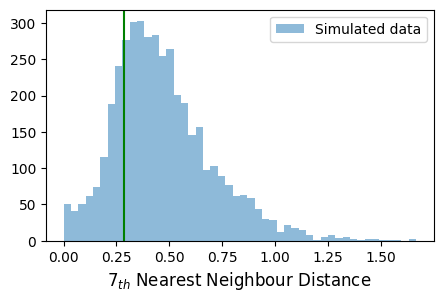

 10%|████▍                                       | 1/10 [00:05<00:46,  5.14s/it]

0.28599588927798403


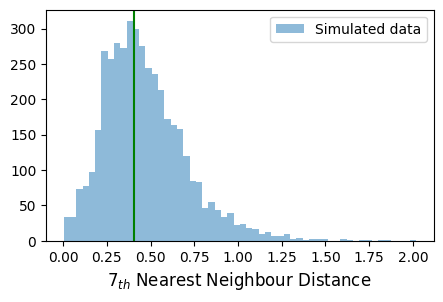

 20%|████████▊                                   | 2/10 [00:10<00:41,  5.14s/it]

0.404420694805744


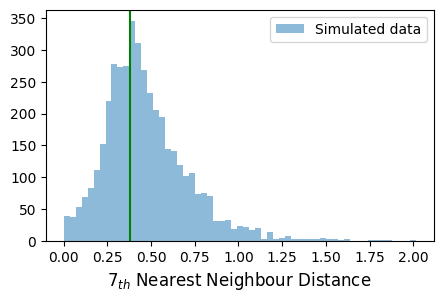

 30%|█████████████▏                              | 3/10 [00:15<00:36,  5.20s/it]

0.3776092577284691


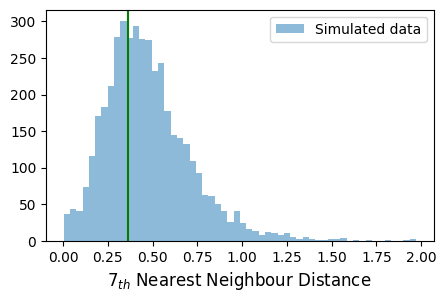

 40%|█████████████████▌                          | 4/10 [00:21<00:32,  5.37s/it]

0.3601128501827183


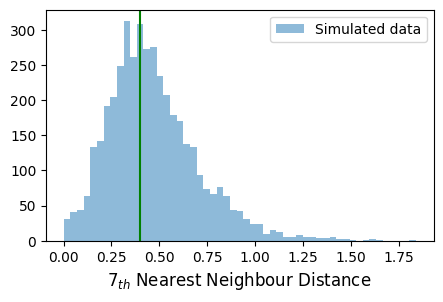

 50%|██████████████████████                      | 5/10 [00:26<00:26,  5.31s/it]

0.39708468146688913


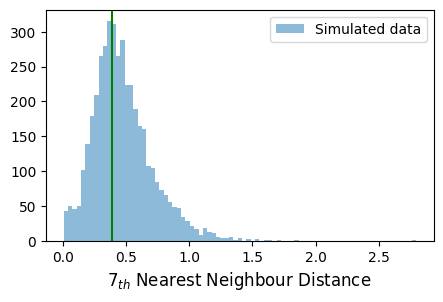

 60%|██████████████████████████▍                 | 6/10 [00:31<00:21,  5.32s/it]

0.3883919675303916


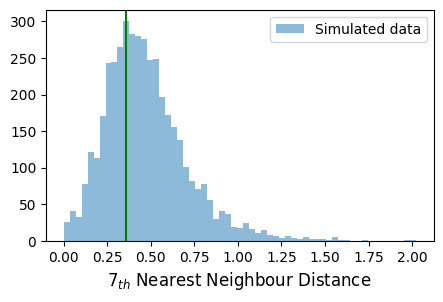

 70%|██████████████████████████████▊             | 7/10 [00:37<00:16,  5.41s/it]

0.3569712848043529


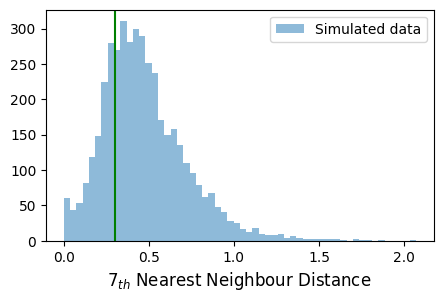

 80%|███████████████████████████████████▏        | 8/10 [00:42<00:10,  5.37s/it]

0.304128094570469


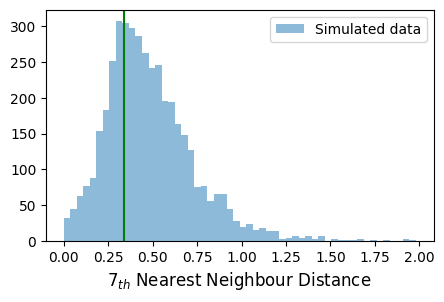

 90%|███████████████████████████████████████▌    | 9/10 [00:48<00:05,  5.39s/it]

0.33839595805888484


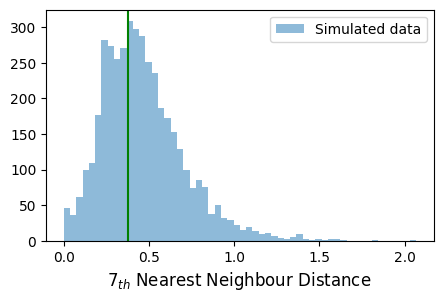

100%|███████████████████████████████████████████| 10/10 [00:53<00:00,  5.33s/it]

0.37728978621554277


In [45]:
eps_simulated = []
for k in tqdm(range(0,10)):
    names = ['parallax','ra','dec','pmra','pmdec']
    params = [results_parallax.x, results_ra.x, results_dec.x, results_pmra.x, results_pmdec.x]
    simulated_data = []
    for x,i in enumerate(names):
        n_iteraciones = 5000
        #nc, s1, s2, mu1, mu2 = params[x]
        parameters = params[x]
        data = df[i]
        sampling = Metropolis(n_iteraciones, data, parameters)
        simulated_data.append(sampling)
        #plt.figure(figsize=(5,3))
        #bin_heights, bin_borders,_=plt.hist(sampling, bins='auto',density=True)
        #bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
        #x = np.linspace(bin_borders[0], bin_borders[-1], 10000)
        #plt.plot(x, pdf(x, parameters))
        #plt.xlabel(i, fontsize=12)
        #plt.legend()
        #plt.show()
    
    df_simulated=pd.DataFrame(np.array(simulated_data).transpose(),columns=['parallax','ra','dec','pmra','pmdec'])
    df_simulated = df_simulated.astype('float32')
    df_simulated = StandardScaler().fit(df_simulated).transform(df_simulated)

    neigh = NearestNeighbors(n_neighbors = 7, algorithm = 'ball_tree', n_jobs=4).fit(df_simulated)
    distances_simulated, indices = neigh.kneighbors(df_simulated)
    distances_simulated = np.sort(distances_simulated, axis = 0)
    distances_simulated = np.array(distances_simulated[:,1])
    distances_simulated = distances_simulated[(distances_simulated != 0.0)]
    hist, bin_edges = np.histogram(distances_simulated, bins='auto',
                                   range=(0.01,max(distances_simulated)))
    i = hist.argmax()

    #eps_simulated.append(min(distances_simulated))
    eps_simulated.append(bin_edges[i])
    plt.figure(figsize=(5,3))
    #plt.hist(distances, bins='auto', label='Region of Blanco 1',histtype=u'step')
    plt.hist(distances_simulated, bins='auto', label='Simulated data', alpha=0.5)#histtype=u'step'
    plt.xlabel(r'$7_{th}$ Nearest Neighbour Distance ', fontsize=12)
    #plt.xlim(0,0.6)
    plt.axvline(eps_simulated[k],c='green')
    plt.legend()
    plt.show()
    print(eps_simulated[k])

In [46]:
#np.savetxt('./blanco1_eps_simulated.txt', eps_simulated, delimiter=',')
eps_simulated

[0.28599588927798403,
 0.404420694805744,
 0.3776092577284691,
 0.3601128501827183,
 0.39708468146688913,
 0.3883919675303916,
 0.3569712848043529,
 0.304128094570469,
 0.33839595805888484,
 0.37728978621554277]

# K Nearest Neighbour Distance

In [58]:
data = df[['parallax','ra','dec','pmra','pmdec']]
data = data.astype('float32')
data = StandardScaler().fit(data).transform(data)

neigh = NearestNeighbors(n_neighbors=7, algorithm = 'ball_tree',n_jobs=4).fit(data)
distances, indices = neigh.kneighbors(data)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

#eps_simulated = np.loadtxt('./pleiades_eps_simulated.txt')

hist, bin_edges = np.histogram(distances, bins='auto',range=(min(distances),max(distances)))
i = hist.argmax()
max_value = bin_edges[i]
#min_value = min(bin_edges)
average_eps_simulated = np.average(eps_simulated)
#average_distance = np.average(distances)
print(average_eps_simulated)

0.35904004646414456


In [60]:
df_pm = pd.read_csv('./blanco1_PMmodel.csv')
#df_pm = pd.read_csv('./pleiades_pm_corrected_distance.csv')

df_pm['parallax'] = df_pm['parallax'] * 1000
df_pm['parallax_error'] = df_pm['parallax_error'] * 1000

data_pm = df_pm[['parallax','ra','dec','pmra','pmdec']]
data_pm = data_pm.astype('float32')
data_pm = StandardScaler().fit(data_pm).transform(data_pm)

neigh = NearestNeighbors(n_neighbors=7, algorithm = 'ball_tree',n_jobs=4).fit(data_pm)
distances_pm, indices_pm = neigh.kneighbors(data_pm)
distances_pm = np.sort(np.mean(distances_pm, axis = 1))

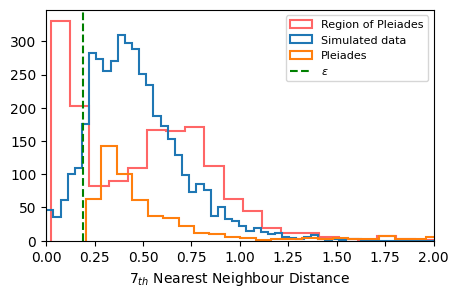

In [61]:
hist, bin_edges = np.histogram(distances_pm, bins='auto',range=(min(distances_pm),max(distances_pm)))
i = hist.argmax()
max_value_pm = bin_edges[i]

fig, ax = plt.subplots(figsize=[5, 3]) # create a new figure with a default 111 subplot
#plt.subplots_adjust(bottom = 0.15)
ax.hist(distances, bins='auto', label='Region of Pleiades',histtype=u'step',color='red',lw=1.5,alpha=0.6)
ax.hist(distances_simulated, bins='auto', label='Simulated data',histtype=u'step',lw=1.5)
ax.hist(distances_pm, bins='auto', label='Pleiades',histtype=u'step',lw=1.5)
plt.xlabel(r'$7_{th}$ Nearest Neighbour Distance ', fontsize=10)
plt.xlim(0.0,2.0)
#plt.axvline(average_eps_simulated, label=r'Simulated $\epsilon=$ {:.09}'.format(0.11623179806790337),c='cyan')
#plt.axvline(average_eps_simulated,c='red')
plt.axvline((max_value+average_eps_simulated)/2,c='green',label=r'$\epsilon$',ls='--')
#plt.axvline((max_value+max_value_pm)/2,label='max',c='blue')
#plt.axvline(max_value,label='max_value')
plt.legend(fontsize=8)
#plt.savefig('./results/pleiades_7nnd_nuevo.png',bbox_inches='tight')

In [62]:
print('max_value:',max_value)
print('Average eps simulated:',average_eps_simulated)
eps = (max_value + average_eps_simulated)/2
#eps1 = max_value_pm
#print(eps1)
print('eps:',eps)

max_value: 0.025734696248493196
Average eps simulated: 0.35904004646414456
eps: 0.19238737135631886


# DBSCAN

In [64]:
db = DBSCAN(eps = eps, min_samples = 4, n_jobs = 8, algorithm='ball_tree').fit(data)
labels = db.labels_ 
df['Clusters'] = labels
for i in list(set(labels)):
    print('{} {}'.format(i,len(df[(df['Clusters'] == i)])))

0 420
-1 1183


In [24]:
#for i in list(set(labels)):
#    if len(df[(df['Clusters'] == i)]) > 50:
#        print('{} {}'.format(i,len(df[(df['Clusters'] == i)])))

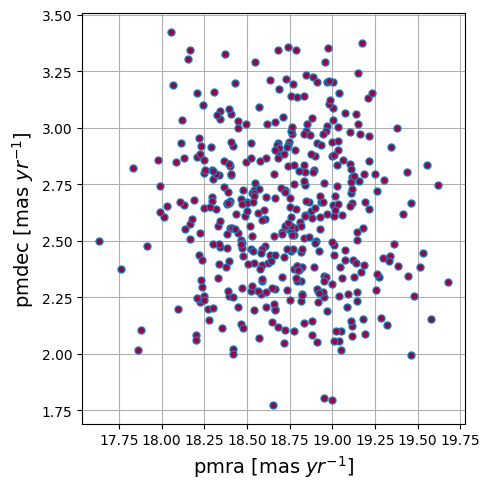

In [65]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(5,5))
for i, j in zip(list(unique_labels), colors):
    if not i == -1:# or i == 0:
        plt.plot(df['pmra'][(df['Clusters'] == i)], df['pmdec'][(df['Clusters'] == i)], 
         markerfacecolor = tuple(j),marker = 'o', linestyle='None',markersize = 5, alpha = 1)
#else:
        #plt.plot(df['pmra'][(df['Clusters'] == i)], df['pmdec'][(df['Clusters'] == i)], 
        # color = 'black', marker='o' ,linestyle = 'None', markersize = 5, alpha = 1)
        #plt.scatter(0,0,marker='.')
plt.xlabel("pmra [mas $yr^{-1}$]",  fontsize = 14)
plt.ylabel("pmdec [mas $yr^{-1}$]",  fontsize = 14)#,rotation=0)
#plt.xlim(-40,20)
#plt.ylim(-20,40)
plt.tight_layout()
plt.grid()
#plt.savefig('./dbscan_images/blanco1_vpd_dbscan_complete.jpg',bbos_inches='tight')
plt.show() #should be on pmra(-26,-16) and pmdec(10,20)

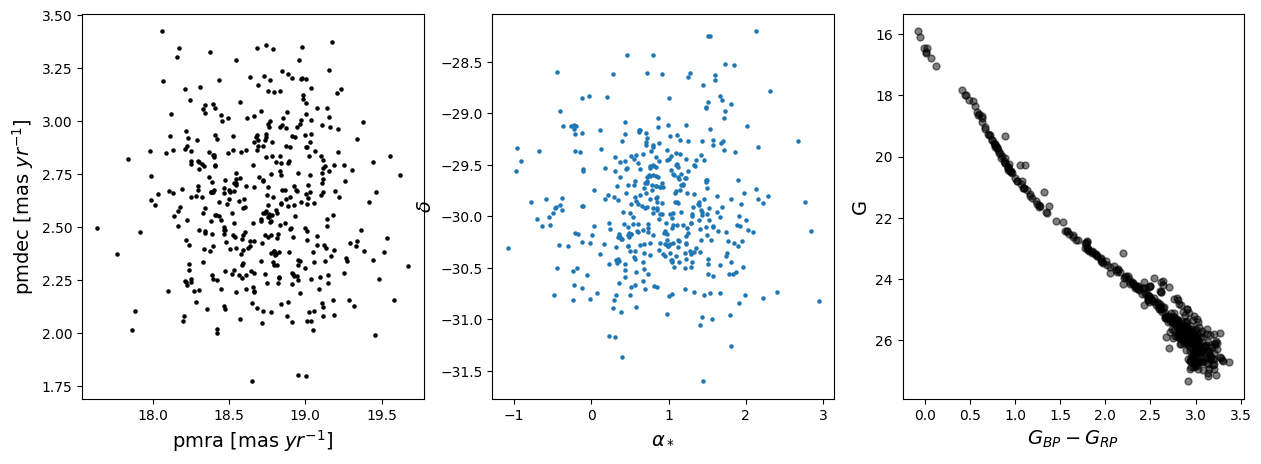

In [66]:
n = 0
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df['pmra'][(df['Clusters'] == n)], df['pmdec'][(df['Clusters'] == n)], 
             color = 'black', marker='o' , s = 5, alpha = 1)
plt.xlabel("pmra [mas $yr^{-1}$]", fontsize = 14)
plt.ylabel("pmdec [mas $yr^{-1}$]", fontsize = 14)#,rotation=0)
#plt.xlim(-40,20)
#plt.ylim(-20,40)

plt.subplot(1,3,2)
plt.scatter(df['ra'][(df['Clusters'] == n)], df['dec'][(df['Clusters'] == n)], marker='o' , s=5, alpha = 1)
plt.xlabel(r'$\alpha_*$',fontsize = 14)
plt.ylabel(r'$\delta$',fontsize = 14)

g_mag = df['g'][(df['Clusters'] == n)] + 5 - 5*np.log10(1/df['parallax'][(df['Clusters'] == n)])
color = df['bp'][(df['Clusters'] == n)] - df['rp'][(df['Clusters'] == n)]
plt.subplot(1,3,3)
plt.plot(color, g_mag,color='black',marker='o',linestyle='None',markersize=5,alpha=0.5)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize = 14)
plt.ylabel("G", fontsize = 14)
plt.gca().invert_yaxis()
#plt.savefig('./vpd.jpg')
plt.show()

In [15]:
#df_test = df[(df['Clusters'] == n)]
#df_test.to_csv('./blanco1_dbscan.csv')

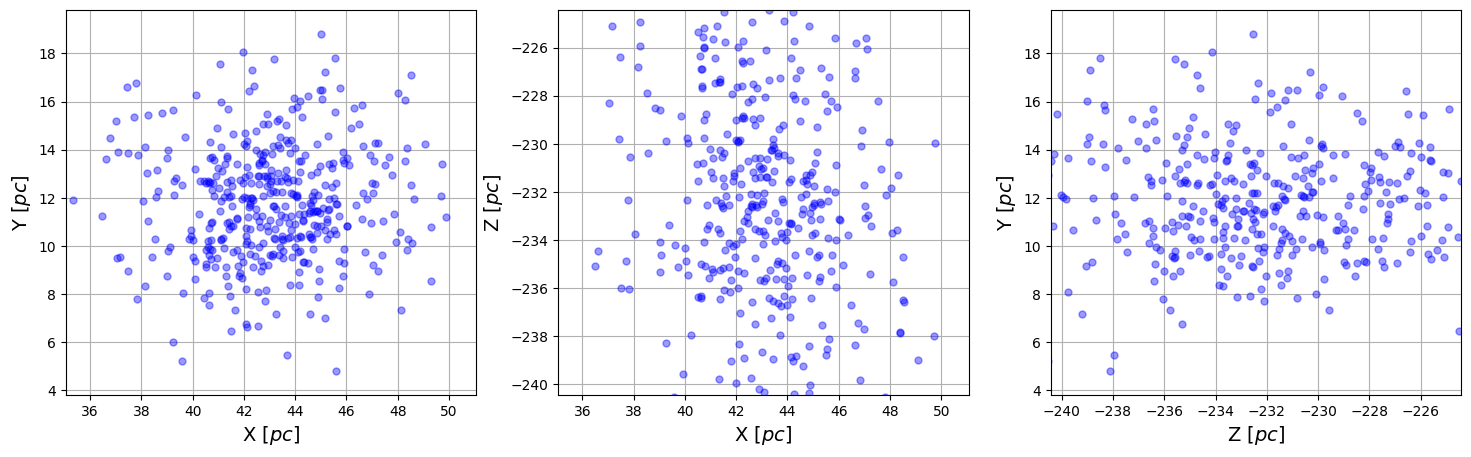

In [67]:
import astropy.units as u
import astropy.coordinates as apycoords

n = 0
df_test = df[(df['Clusters'] == n)]
df_test['parallax'] = df_test['parallax'] / 1000
df_test['parallax_error'] = df_test['parallax_error'] / 1000
#df_test.to_csv('./pleiades_dbscan.csv')

ra_ = df_test['ra'] *u.deg
dec_ = df_test['dec'] *u.deg
distance_ = np.array(1/df_test['parallax']) *u.pc

c = apycoords.SkyCoord(ra=ra_,dec=dec_,distance=distance_,frame='icrs')
#print("(X,Y,Z) in (kpc,kpc,kpc)")
#print("\t",c.galactic.cartesian)
x = c.galactic.cartesian.x
y = c.galactic.cartesian.y
z = c.galactic.cartesian.z

xp = np.mean(x.to_value())
yp = np.mean(y.to_value())
zp = np.mean(z.to_value())
value = 8

%matplotlib inline
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(x, y,color='blue',marker='o',linestyle='None',markersize=5,alpha=0.4)
plt.xlim(xp - value,xp + value)
plt.ylim(yp - value,yp + value)
plt.xlabel("X $[pc]$", fontsize = 14)
plt.ylabel("Y $[pc]$", fontsize = 14)#,rotation=0)
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, z,color='blue',marker='o',linestyle='None',markersize=5,alpha=0.4)
plt.xlim(xp - value,xp + value)
plt.ylim(zp - value,zp + value)
plt.xlabel("X $[pc]$", fontsize = 14)
plt.ylabel("Z $[pc]$", fontsize = 14)#,rotation=0)
plt.grid()

plt.subplot(1,3,3)
plt.plot(z, y,color='blue',marker='o',linestyle='None',markersize=5,alpha=0.4)
plt.xlim(zp - value,zp + value)
plt.ylim(yp - value,yp + value)
plt.xlabel("Z $[pc]$", fontsize = 14)
plt.ylabel("Y $[pc]$", fontsize = 14)#,rotation=0)
plt.grid()
#plt.savefig('./results/distribucion_espacial_test.jpg')
plt.show()

In [28]:
# plt.figure(figsize=(5,5))
# plt.grid()
# plt.scatter(df['pmra'][(df['Clusters']==n)],df['pmdec'][(df['Clusters']==n)],color='black',marker='o',s=10,alpha=1)
# plt.xlabel("pmra [mas $yr^{-1}$]", fontsize = 14)
# plt.ylabel("pmdec [mas $yr^{-1}$]", fontsize = 14)#,rotation=0)
# #plt.xlim(-40,20)
# #plt.ylim(-20,40)
# plt.tight_layout()
# plt.savefig('./dbscan_images/blanco1_vpd_dbscan.jpg',bbos_inches='tight')
# plt.show()